In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


Random walk methods: the Metropolis algorithm
---------------------------------------------

Suppose that we want to generate random variables according to an
arbitrary probability density $P(x)$. The Metropolis algorithm produces
a “random walk” of points $\{x_i\}$ whose asymptotic probability
approaches $P(x)$ after a large number of steps. The random walk is
defined by a “transition probability” $w(x_i \rightarrow x_j)$ for one
value $x_i$ to another $x_j$ in order that the distribution of points
$x_0$, $x_1$, $x_2$, ... converges to $P(x)$. In can be shown that it is
sufficient (but not necessary) to satisfy the “detailed balance”
condition $$p(x_i)w(x_i \rightarrow x_j) = p(x_j)w(x_j \rightarrow x_i).
$$ This relation dos not specify $w(x_i \rightarrow x_j)$
uniquely. A simple choice is
$$w(x_i \rightarrow x_j)=\min{\left[ 1,\frac{P(x_j)}{P(x_i)} \right] }.$$
This choice can be described by the following steps. Suppose that the
“random walker” is a position $x_n$. To generate $x_{n+1}$ we

1.  choose a trial position $x_t=x_n+\delta _n$ , where the $\delta _n$
    is a random number in the interval $[-\delta ,\delta]$.

2.  Calculate $w=P(x_t)/P(x_n)$.

3.  If $w \geq 1$ we accept the change and let $x_{n+1}=x_t$.

4.  If $w \leq 1$, generate a random number $r$.

5.  If $r \leq w$, accept the change and let $x_{n+1} = x_t$.

6.  If the trial change is not accepted, the let $x_{n+1}=x_n$.

It is necessary to sample a number of points of the random walk before
the asymptotic probability $P(x)$ is attained. How do we choose the
“step size” $\delta$? If $\delta$ is too large, only a small fraction of
changes will be accepted and the sampling will be inefficient. If
$\delta$ is too small, a large number will be accepted, but it would
take too long to sample $P(x)$ over the whole interval of interest.
Ideally, we want at least 1/3-1/2 of the trial steps to be accepted. We
also want to choose $x_0$ such that the distribution $\{x_i\}$ converges
to $P(x)$ as quickly as possible. An obvious choice is to begin the
random walk at the point where $P(x)$ is maximum.

### Exercise 1: The Gaussian distribution

1.  Use the Metropolis algorithm to generate a Gaussian distribution
    $P(x)=A \exp{(-x^2/2\sigma ^2)}$. Is the numerical value of the
    normalization constant $A$ relevant? Determine the qualitative
    dependence of the acceptance ratio and the equilibrium time on the
    maximum step size $\delta$. One possible criterion for equilibrium
    is that $\langle x^2
    \rangle \approx \sigma ^2$. For $\sigma = 1$, what is a reasonable
    choice of $\delta$? (choose $x_0 = 0$.)

2.  Plot the asymptotic probability distribution generated by the
    Metropolis algorithm.
    

acceptance ratio is 0.9592


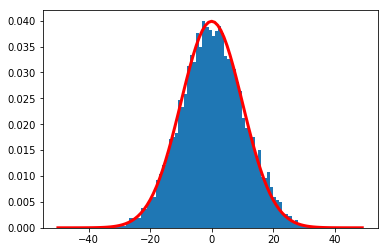

In [7]:
N = 10000
from matplotlib import pyplot

x = np.zeros(N)
delta = 2.
sigma = 10.
sigma2 = sigma**2

def metropolis(xold):
    xtrial = np.random.random()    
    xtrial = xold+(2*xtrial-1)*delta
    weight = np.exp(-0.5*(xtrial**2-xold**2)/sigma2)
    xnew = xold
    if(weight >= 1): #Accept
        xnew = xtrial
    else:
        r = np.random.random()
        if(r <= weight): #Accept
            xnew = xtrial
    return xnew

# Only here to get a better starting point
xwalker = 20.
Nwarmup = 500000
for i in range(Nwarmup):
    xwalker = metropolis(xwalker)
###
x[0] = xwalker

accepted = 0 
for i in range(1,N):
    x0 = x[i-1]
    for j in range(10):
        x0 = metropolis(x0)
    x[i] = metropolis(x0)
    if x[i] != x0:    accepted += 1

binwidth=sigma/10
pyplot.hist(x,bins=np.arange(-50,50., binwidth),density=True);

norm = 1./(sigma*np.sqrt(2*np.pi))
pyplot.plot(np.arange(-50.,50.,binwidth), 
            norm*np.exp(-0.5*np.arange(-50.,50.,binwidth)**2/sigma2),ls='-',c='red',lw=3)
print ('acceptance ratio is', accepted/N)

# HW 04 02

In [8]:
sigma = 10.
sigma2 = sigma**2

def metropolis(xold, delta, sigma2):
    xtrial = np.random.random()    
    xtrial = xold+(2*xtrial-1)*delta
    weight = np.exp(-0.5*(xtrial**2-xold**2)/sigma2)
    xnew = xold
    if(weight >= 1): #Accept
        xnew = xtrial
    else:
        r = np.random.random()
        if(r <= weight): #Accept
            xnew = xtrial
    return xnew

N = 10**5
ratio = []
deltaarray = np.linspace(0.1, 10, 10)
equitime = []


for delta in deltaarray:
    # Only here to get a better starting point
    condition=0
    xwalker = 20.
    Nwarmup = 50000
    for i in range(Nwarmup):
        xwalker = metropolis(xwalker, delta, sigma2)
    ###
    
    x = np.zeros(N)
    x[0] = xwalker
    
    accepted = 0
    i = 0
    while i < N:
        x0 = x[i-1]
        for j in range(10):
            x0 = metropolis(x0, delta, sigma2)
        x[i] = metropolis(x0, delta, sigma2)
        if x[i] != x0:    accepted += 1
        
        xms = np.mean(x[:i+1]**2)
        i += 1
        if i>10**3 and (not i%10) and (abs(1-xms/sigma2) <0.01):
            break
            
    equitime.append(i)
    ratio.append(accepted/i)
    


Text(0,0.5,'Acceptance ratio')

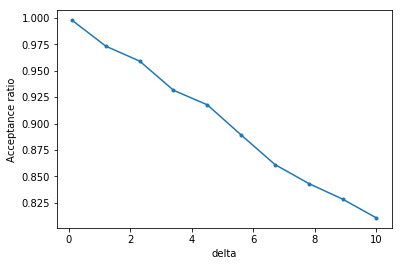

In [9]:
plt.plot(deltaarray, ratio, '.-')
plt.xlabel('delta')
plt.ylabel('Acceptance ratio')

Text(0,0.5,'Equilibrium time')

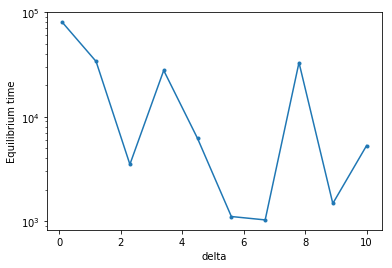

In [11]:
plt.semilogy(deltaarray, equitime, '.-')
plt.xlabel('delta')
plt.ylabel('Equilibrium time')